Últimas atualizações: 
*   14/02 - Giovanna
*   19/02 - Victor Hugo
*   27/02 - Afonso Garcia


# Importes e bibliotecas

In [1]:
!pip install folium
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 879.6 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 1.2 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 4.2 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 4.8 MB/s eta 0:00:005.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.4 MB/s eta 0:00:008.9 MB/s eta 0:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=04512979fa0534747adc8506a65330f393674445068ac0fa9688593236773d14
  Stored in directory: /home/teodoro/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [2]:
import folium
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas_profiling import ProfileReport

%matplotlib inline

/tmp/ipykernel_72754/3724168254.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Setup do ambiente

In [4]:
lat_long_br_states = {"AC": [-8.77, -70.55], "AL": [-9.71, -35.73], "AP": [1.41, -51.77], "AM": [-3.07, -61.66], "BA": [-12.96, -38.51], "CE": [-3.71, -38.54], "DF": [-15.83, -47.86], "ES": [-19.19, -40.34], "GO": [-16.64, -49.31], "MA": [-2.55, -44.30], "MT": [-12.64, -55.42], "MS": [-20.51, -54.54], "MG": [-18.10, -44.38], "PA": [-5.53, -52.29], "PB": [-7.06, -35.55], "PR": [-24.89, -51.55], "PE": [-8.28, -35.07], "PI": [-8.28, -43.68], "RJ": [-22.84, -43.15], "RN": [-5.22, -36.52], "RS": [-30.01, -51.22], "RO": [-11.22, -62.80], "RR": [1.89, -61.22], "SC": [-27.33, -49.44], "SP": [-23.55, -46.64], "SE": [-10.90, -37.07], "TO": [-10.25, -48.25]}


# Análise Exploratória

In [3]:
df = pd.read_excel("./agencias-ano-2022.xlsx")

In [32]:
df.head()

,Número de Inscrição do CNPJ,Nome Fantasia,Tipo de Estabelecimento,Natureza Jurídica,Porte,Endereço Completo Receita Federal,UF,Município,Data de Abertura,Telefone Comercial,...,Número do Certificado,Validade do Certificado,Categoria de Atuação,Atividades Obrigatórias,Atividades Opcionais,Segmentos Turísticos,Quantidade de Veículos,Quantidade de Embarcações,Embarcações Cruzeiro Marítimo,Embarcações Cruzeiro Fluvial/Barco-Hotel
0,19.121.142/0001-35,AGUIATUR,Matriz,Empresário Individual,MICROEMPRESA,da Gameleira LOJA 05 Brasília Centro (São Seba...,DF,Brasília,2013-10-23,(61)3339-0398,...,19.121.142/0001-35,2023-07-06 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,-,Turismo de Saúde,0,0,0,0
1,01.597.335/0001-00,EXTRACLASSE TURISMO,Matriz,Sociedade Empresária Limitada,MICROEMPRESA,SCRN 708/709 Bloco A Brasília Asa Norte CEP: ...,DF,Brasília,1985-12-10,(61)99244-8954,...,01.597.335/0001-00,2022-07-21 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Assessoramento organização e execução de ativ...,Turismo Cultural|Turismo de Estudo e Intercâmb...,2,0,0,0
2,18.558.986/0001-85,DIALOGAR VIAGENS,Matriz,Empresário Individual,MICROEMPRESA,QN 5 Conjunto 3 ANDAR sala 101 Brasília Riach...,DF,Brasília,2013-07-25,(61)3208-3096,...,18.558.986/0001-85,2023-11-12 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Intermediação remunerada na reserva e contrata...,Turismo de Estudo e Intercâmbio|Turismo de Neg...,0,0,0,0
3,19.272.029/0001-50,EBANO TURISMO E EVENTOS,Matriz,Empresário Individual,MICROEMPRESA,QC 15 Rua L COND Ipes Brasília Jardins Manguei...,DF,Brasília,2013-11-19,(61)99688-5717,...,19.272.029/0001-50,2023-12-15 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Intermediação remunerada na reserva e contrata...,Ecoturismo|Turismo de Negócios e Eventos|Turis...,0,0,0,0
4,23.335.170/0001-22,BB VITOR LOCACAO E TURISMO,Matriz,Empresário (Individual),MICROEMPRESA,SMPW Quadra 3 CASA Brasília Park Way CEP: 7173...,DF,Brasília,2015-09-23,(61)3386-0243,...,23.335.170/0001-22,2022-07-19 00:00:00,Agência de Viagens e Turismo (Operadoras Turís...,Assessoramento planejamento e organização de ...,Assessoramento organização e execução de ativ...,Turismo de Aventura|Turismo Cultural|Turismo d...,2,0,0,0


Quais as colunas?

In [33]:
df.columns

Index(['Número de Inscrição do CNPJ', 'Nome Fantasia',
       'Tipo de Estabelecimento', 'Natureza Jurídica', 'Porte',
       'Endereço Completo Receita Federal', 'UF', 'Município',
       'Data de Abertura', 'Telefone Comercial', 'E-mail Comercial', 'Website',
       'Número do Certificado', 'Validade do Certificado',
       'Categoria de Atuação', 'Atividades Obrigatórias',
       'Atividades Opcionais', 'Segmentos Turísticos',
       'Quantidade de Veículos', 'Quantidade de Embarcações',
       'Embarcações Cruzeiro Marítimo',
       'Embarcações Cruzeiro Fluvial/Barco-Hotel'],
      dtype='object')

Quantas linhas?

In [20]:
df.index

RangeIndex(start=0, stop=135776, step=1)

Quantos de cada estado?

In [21]:
df["UF"].value_counts()

SP    38941
RJ    17768
MG    11185
RS     8021
PR     7290
SC     5629
BA     5350
PE     4797
GO     4472
CE     3789
DF     3557
AL     2938
AM     2483
MA     2388
PB     2295
ES     2197
PA     1986
MS     1864
RN     1724
MT     1677
SE     1319
TO     1057
RO      881
PI      784
AC      550
RR      469
AP      365
Name: UF, dtype: int64

Qual a natureza jurídica da maioria?

In [22]:
df["Natureza Jurídica"].value_counts()

Empresário Individual                                                       67394
Sociedade Empresária Limitada                                               44350
Empresário (Individual)                                                     11855
Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)    10105
Serviço Social Autônomo                                                       765
Sociedade Simples Limitada                                                    660
Sociedade Anônima Fechada                                                     250
Cooperativa                                                                   124
Empresa Individual de Responsabilidade Limitada (de Natureza Simples)         124
Sociedade Anônima Aberta                                                      110
Sociedade Simples Pura                                                         36
Estabelecimento, no Brasil, de Sociedade Estrangeira                            3
Name: Natureza J

Qual a categoria de atuação da maioria?

In [23]:
df["Categoria de Atuação"].value_counts()

Agência de Viagens                                      97891
Agência de Viagens e Turismo (Operadoras Turísticas)    37876
-                                                           5
673.580.128-87                                              4
Name: Categoria de Atuação, dtype: int64

Professor ensinou um jeito mais fácil... basta abrir o html abaixo:

In [4]:
design_report = ProfileReport(df)
design_report.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Distribuição geográfica de empresas de turismo por estados brasileiros


In [25]:
states_count = df["UF"].value_counts()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for uf, count in states_count.items():
    if uf in lat_long_br_states.keys():
        folium.CircleMarker(location=lat_long_br_states[uf], radius=count/300, popup=f"{uf}: {count} empresas de turismo", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Quais segmentos turísticos são mais populares em estados brasileiros 

In [34]:
temp = df.copy()

uf_segments = temp[["UF", "Segmentos Turísticos"]]

# global_total = uf_segments["UF"].count()

dummies = uf_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
uf_segments = pd.concat([uf_segments, dummies], axis=1)

uf_segments = uf_segments.drop(["Segmentos Turísticos", "-"], axis=1)

for column in uf_segments.columns:
    if uf_segments[column][0] in [0, 1] and uf_segments[column].sum() <= 2:
        uf_segments = uf_segments.drop(column, axis=1)

grouped = uf_segments.groupby("UF").sum()

max_values = grouped.max(axis=1, numeric_only=True)
min_values = grouped.min(axis=1, numeric_only=True)

grouped = grouped.apply(lambda row: row.apply(lambda elem: -1 if elem != max_values[row.name] and elem != min_values[row.name] else elem), axis=1)

total_dict = uf_segments["UF"].value_counts().to_dict()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for state in grouped.index:
    values = sorted(grouped.loc[state], reverse=True)

    values_dict = grouped.loc[state].to_dict()
    max_name = max(values_dict, key=values_dict.get)
    
    folium.CircleMarker(location=lat_long_br_states[state], radius=(values[0]/total_dict[state])*30, popup=f"O segmento turístico mais popular no estado de {state} é {max_name} com {values[0]} empresas, de um total de {total_dict[state]} empresas", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Quais segmentos turísticos são menos populares em estados brasileiros 

In [35]:
temp = df.copy()

uf_segments = temp[["UF", "Segmentos Turísticos"]]

dummies = uf_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
uf_segments = pd.concat([uf_segments, dummies], axis=1)

uf_segments = uf_segments.drop(["Segmentos Turísticos", "-"], axis=1)

for column in uf_segments.columns:
    if uf_segments[column][0] in [0, 1] and uf_segments[column].sum() <= 2:
        uf_segments = uf_segments.drop(column, axis=1)

grouped = uf_segments.groupby("UF").sum()

max_values = grouped.max(axis=1, numeric_only=True)
min_values = grouped.min(axis=1, numeric_only=True)

grouped = grouped.apply(lambda row: row.apply(lambda elem: math.inf if elem != max_values[row.name] and elem != min_values[row.name] else elem), axis=1)

total_dict = uf_segments["UF"].value_counts().to_dict()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for state in grouped.index:
    values = sorted(grouped.loc[state], reverse=False)

    values_dict = grouped.loc[state].to_dict()
    min_name = min(values_dict, key=values_dict.get)
    
    folium.CircleMarker(location=lat_long_br_states[state], radius=((values[0]+1)**-1)*25, popup=f"O segmento turístico menos popular no estado de {state} é {min_name} com {int(values[0])} empresas, de um total de {total_dict[state]} empresas", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Relação entre o porte da empresa e seu segmento turístico



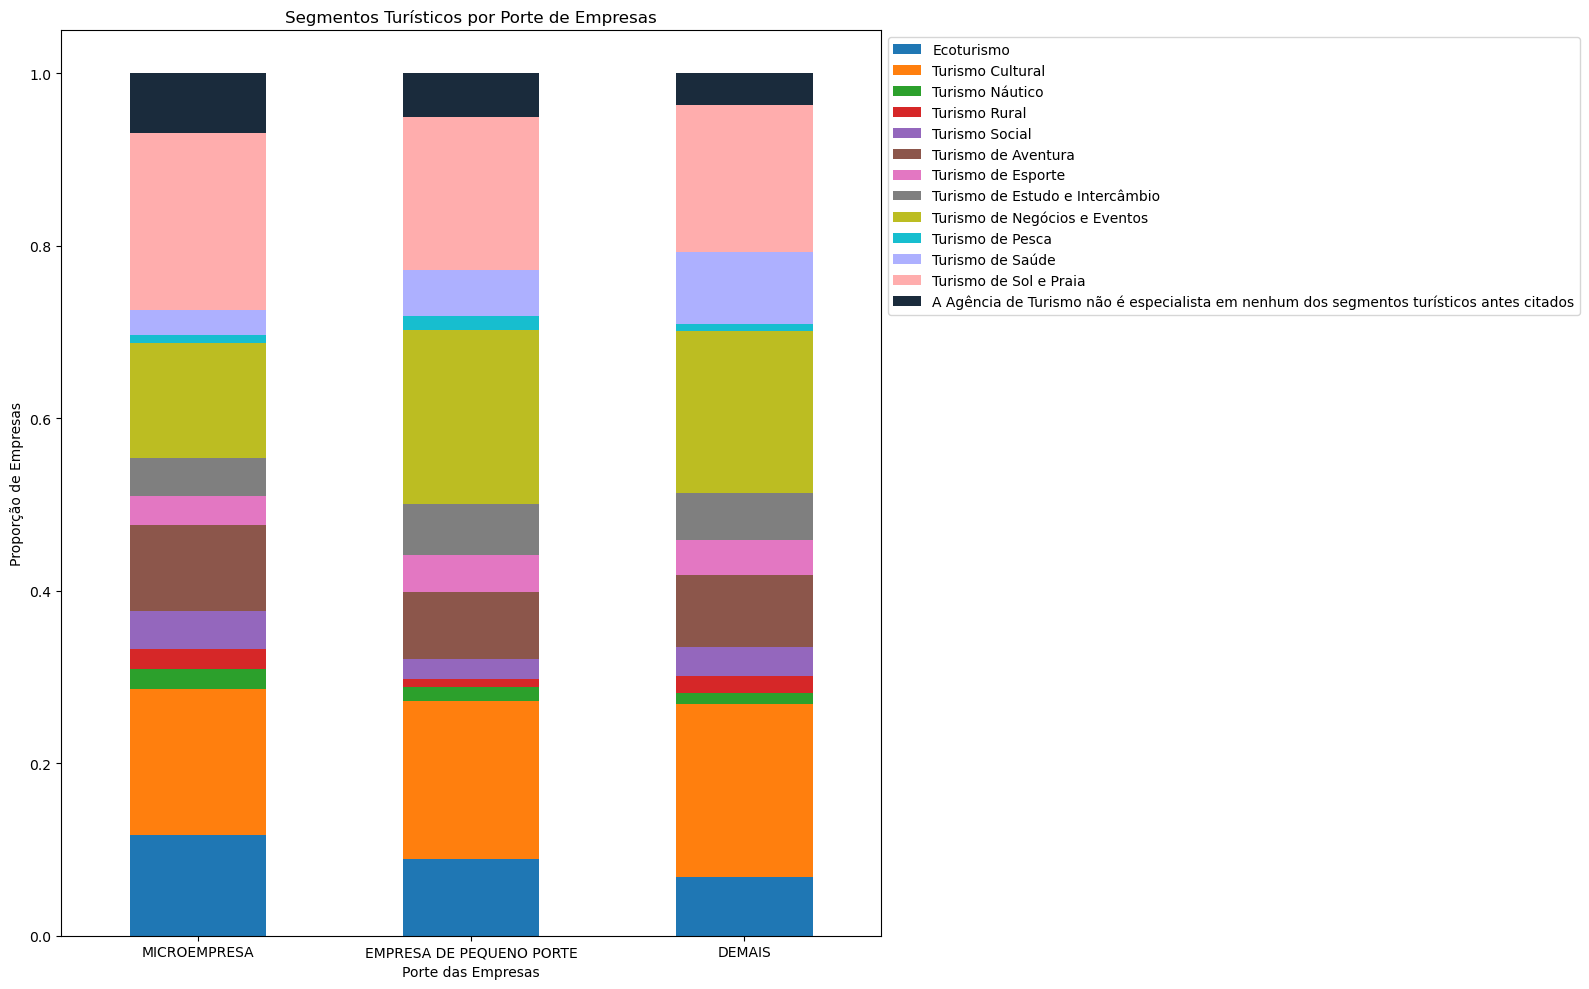

In [36]:
size_and_segments = df.copy()

size_and_segments = size_and_segments[["Porte", "Segmentos Turísticos"]]

dummies = size_and_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
size_and_segments = pd.concat([size_and_segments, dummies], axis=1)

size_and_segments = size_and_segments.drop("Segmentos Turísticos", axis=1)

grouped = size_and_segments.groupby("Porte").sum()

grouped = grouped.copy()

grouped = grouped.loc[:, grouped.columns[grouped.sum() != 1]]

grouped = grouped.drop("-", axis=1)

grouped.head()

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#adb0ff", "#ffadad", "#1a2b3c"]

segment_order = ["Ecoturismo", "Turismo Cultural", "Turismo Náutico", "Turismo Rural", 
                 "Turismo Social", "Turismo de Aventura", "Turismo de Esporte", 
                 "Turismo de Estudo e Intercâmbio", "Turismo de Negócios e Eventos", 
                 "Turismo de Pesca", "Turismo de Saúde", "Turismo de Sol e Praia",
                 "A Agência de Turismo não é especialista em nenhum dos segmentos turísticos antes citados"]

grouped_perc = grouped.div(grouped.sum(axis=1), axis=0)  
grouped_perc = grouped_perc.reindex(columns=segment_order) 

grouped_perc = grouped_perc.sort_values(by="Porte", ascending=False) 

fig, ax = plt.subplots(figsize=(16, 10))
grouped_perc.plot(kind="bar", stacked=True, ax=ax, color=colors)
ax.set_xticklabels(grouped_perc.index, rotation=0)
ax.set_xlabel("Porte das Empresas")
ax.set_ylabel("Proporção de Empresas")
ax.set_title("Segmentos Turísticos por Porte de Empresas")

handles = []
for i, _ in enumerate(segment_order):
    handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
ax.legend(handles, segment_order, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Análise de frequência das atividades obrigatórias e opcionais por porte da empresa

In [28]:
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
#           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
#           "#adb0ff", "#ffadad", "#1a2b3c"]

# freqs = df.copy()

# freq_obrigatorias = freqs["Atividades Obrigatórias"].str.split("|")

# dummies_obrigatorias = freqs["Atividades Obrigatórias"].str.get_dummies(sep="|")

# freq_obrigatorias = pd.concat([freqs["Porte"], dummies_obrigatorias], axis=1)

# grouped_obrigatorias = freq_obrigatorias.groupby("Porte").sum()

# grouped_obrigatorias = grouped_obrigatorias.drop("Agência de Viagens", axis=1)

# grouped_perc_obrigatorias = grouped_obrigatorias.div(grouped_obrigatorias.sum(axis=1), axis=0)  
# grouped_perc_obrigatorias = grouped_perc_obrigatorias.reindex(columns=grouped_obrigatorias.columns) 
# grouped_perc_obrigatorias = grouped_perc_obrigatorias.sort_values(by="Porte", ascending=False) 


# fig, ax = plt.subplots(figsize=(30, 10))
# grouped_perc_obrigatorias.plot(kind="bar", stacked=True, ax=ax, color=colors)
# ax.set_xticklabels(grouped_perc_obrigatorias.index, rotation=0)
# ax.set_xlabel("Porte das Empresas")
# ax.set_ylabel("Proporção")
# ax.set_title("Frequência das atividades obrigatórias por porte da empresa")

# handles = []
# for i, _ in enumerate(grouped_perc_obrigatorias.columns):
#     handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
# ax.legend(handles, grouped_perc_obrigatorias.columns, loc="upper left", bbox_to_anchor=(1, 1))

# plt.tight_layout()
# plt.show()




# freq_opcionais = freqs["Atividades Opcionais"].str.split("|")
# dummies_opcionais = freqs["Atividades Opcionais"].str.get_dummies(sep="|")
# freq_opcionais = pd.concat([freqs["Porte"], dummies_opcionais], axis=1)

# grouped_opcionais = freq_opcionais.groupby("Porte").sum()

# grouped_opcionais = grouped_opcionais.drop("-", axis=1)

# grouped_perc_opcionais = grouped_opcionais.div(grouped_opcionais.sum(axis=1), axis=0)  
# grouped_perc_opcionais = grouped_perc_opcionais.reindex(columns=grouped_opcionais.columns) 
# grouped_perc_opcionais = grouped_perc_opcionais.sort_values(by="Porte", ascending=False) 



# fig, ax = plt.subplots(figsize=(30, 10))
# grouped_perc_opcionais.plot(kind="bar", stacked=True, ax=ax, color=colors)
# ax.set_xticklabels(grouped_perc_opcionais.index, rotation=0)
# ax.set_xlabel("Porte das Empresas")
# ax.set_ylabel("Proporção")
# ax.set_title("Frequência das atividades opcionais por porte da empresa")

# handles = []
# for i, _ in enumerate(grouped_perc_opcionais.columns):
#     handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
# ax.legend(handles, grouped_perc_opcionais.columns, loc="upper left", bbox_to_anchor=(1, 1))

# plt.tight_layout()
# plt.show()